<a href="https://colab.research.google.com/github/ritwiks9635/CSV_Projects_File/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##https://www.kaggle.com/datasets/ shivam2503/diamonds##

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Load Dataset

In [ ]:
data = pd.read_csv("/content/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.shape

(53940, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Preproces the dataset

In [ ]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head(45)

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data = data.drop(data[data["x"] == 0].index)
data = data.drop(data[data["y"] == 0].index)
data = data.drop(data[data["z"] == 0].index)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0, 0.5, 'table')

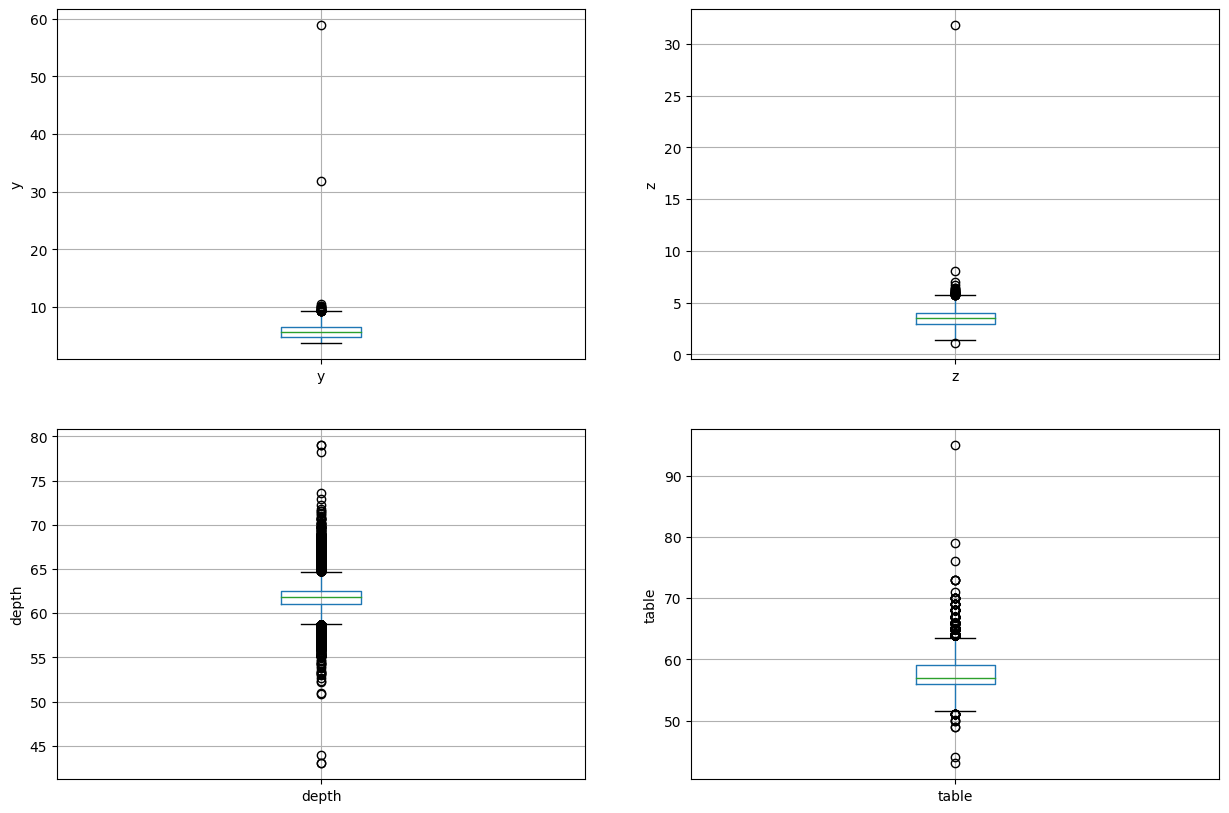

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='y')
fig.set_title('')
fig.set_ylabel('y')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='z')
fig.set_title('')
fig.set_ylabel('z')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='depth')
fig.set_title('')
fig.set_ylabel('depth')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='table')
fig.set_title('')
fig.set_ylabel('table')

In [ ]:
# find outliers for y variable

IQR = data.y.quantile(0.75) - data.y.quantile(0.25)
Lower_fence = data.y.quantile(0.25) - (IQR * 3)
Upper_fence = data.y.quantile(0.75) + (IQR * 3)
print('y outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

y outliers are values < -0.7400000000000011 or > 12.0


In [ ]:
# find outliers for z variable

IQR = data.z.quantile(0.75) - data.z.quantile(0.25)
Lower_fence = data.z.quantile(0.25) - (IQR * 3)
Upper_fence = data.z.quantile(0.75) + (IQR * 3)
print('z outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

z outliers are values < -0.47999999999999954 or > 7.43


In [ ]:
# find outliers for depth variable

IQR = data.depth.quantile(0.75) - data.depth.quantile(0.25)
Lower_fence = data.depth.quantile(0.25) - (IQR * 3)
Upper_fence = data.depth.quantile(0.75) + (IQR * 3)
print('depth outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

depth outliers are values < 56.5 or > 67.0


In [ ]:
# find outliers for table variable

IQR = data.table.quantile(0.75) - data.table.quantile(0.25)
Lower_fence = data.table.quantile(0.25) - (IQR * 3)
Upper_fence = data.table.quantile(0.75) + (IQR * 3)
print('table outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

table outliers are values < 47.0 or > 68.0


In [ ]:
#Dropping the outliers.
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


# Some Analysis Dataset

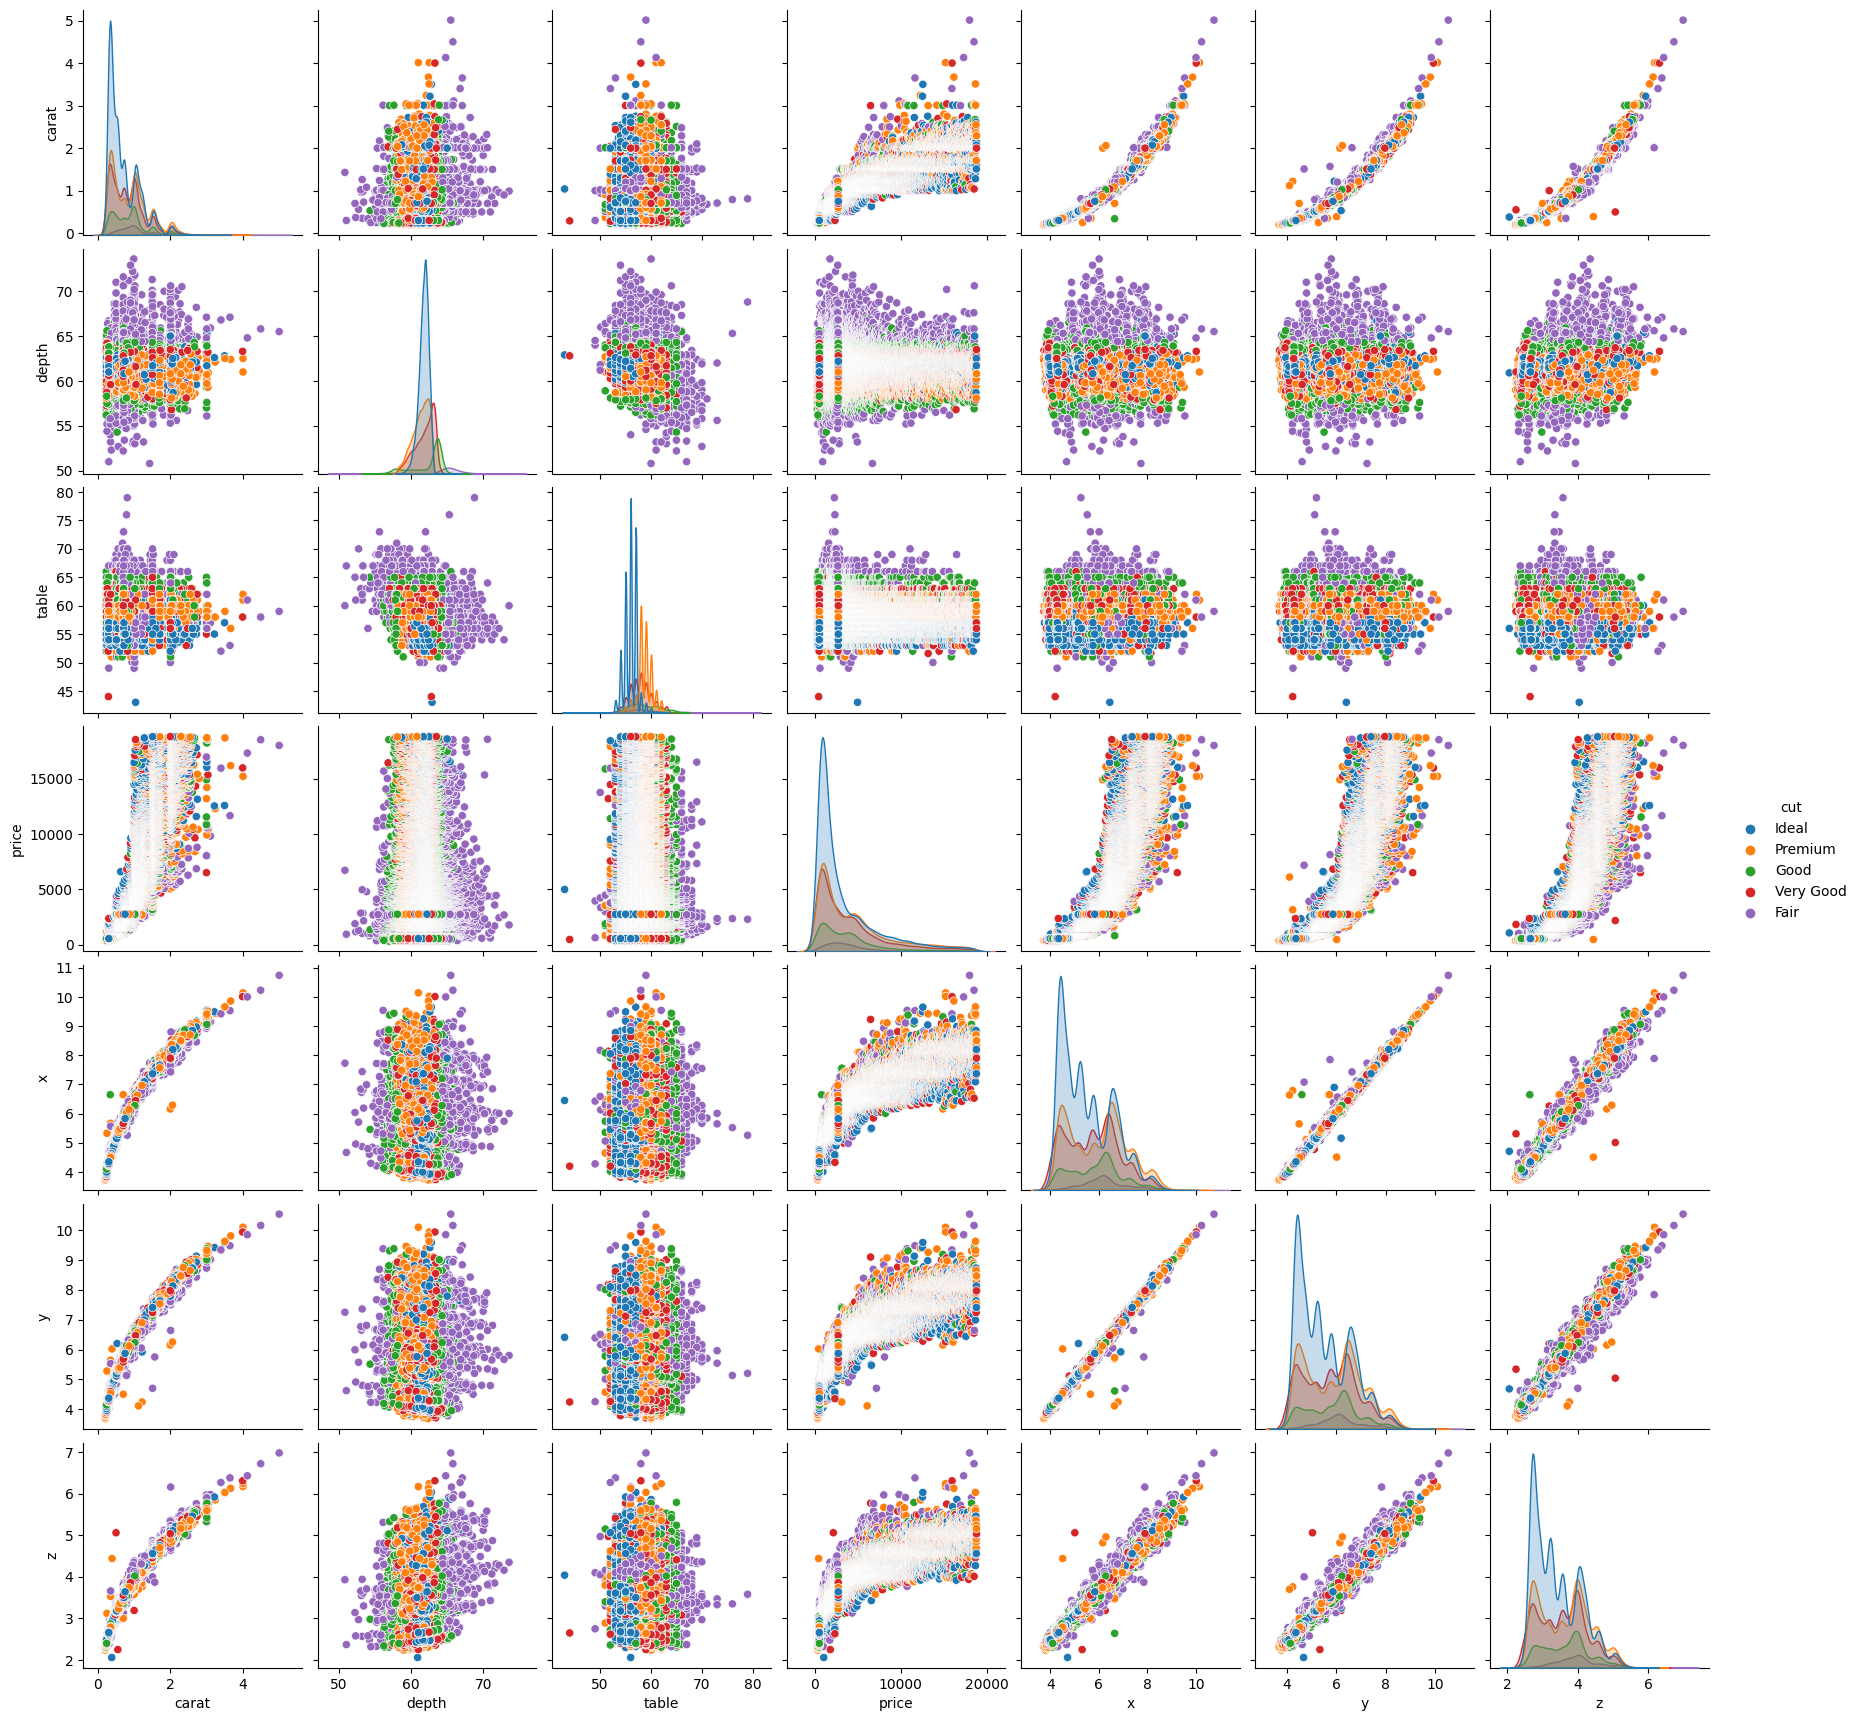

In [ ]:
sns.pairplot(data, hue = "cut")

In [ ]:
cat = data.dtypes == "object"

In [ ]:
cat = [cat for cat in data.columns if data[cat].dtypes == "object"]
print(cat)

['cut', 'color', 'clarity']


In [ ]:
data_c = data.copy()
L_E = LabelEncoder()
for c in cat:
  data_c[c] = L_E.fit_transform(data_c[c])

data_c.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53907 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53907 non-null  float64
 1   cut      53907 non-null  int64  
 2   color    53907 non-null  int64  
 3   clarity  53907 non-null  int64  
 4   depth    53907 non-null  float64
 5   table    53907 non-null  float64
 6   price    53907 non-null  int64  
 7   x        53907 non-null  float64
 8   y        53907 non-null  float64
 9   z        53907 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [ ]:
corr = data_c.corr()

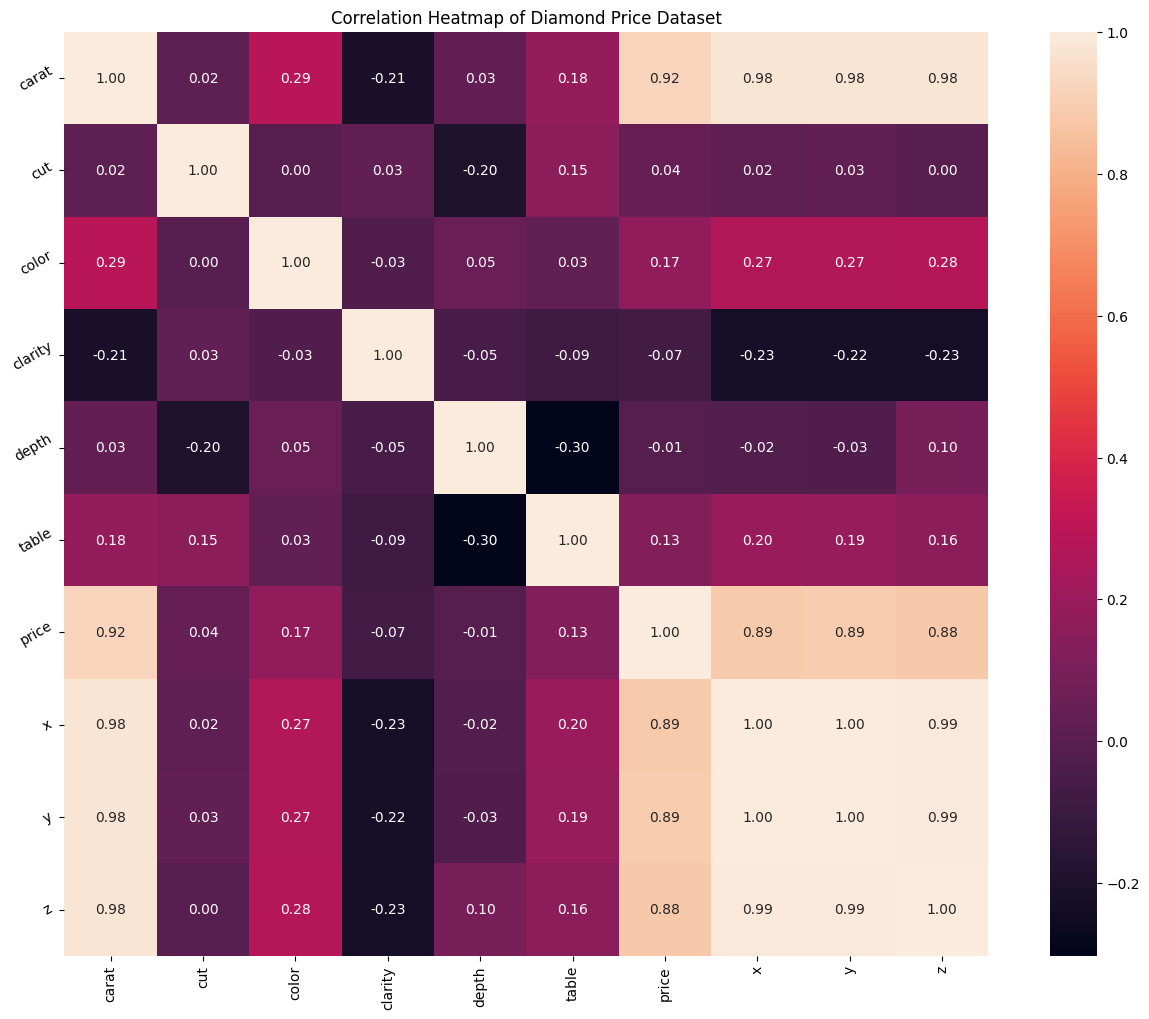

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Diamond Price Dataset')
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

# Split The dataset

In [ ]:
X = data_c.drop(["price"], axis = 1)
y = data_c["price"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# Build Model Pipeline

In [ ]:
lr_pipeline = Pipeline([("s_c1", StandardScaler()),
            ("l_r", LinearRegression())])
dtr_pipeline = Pipeline([("s_c2", StandardScaler()),
            ("d_t_r", DecisionTreeRegressor())])
rfr_pipeline = Pipeline([("s_c3", StandardScaler()),
            ("r_f_r", RandomForestRegressor())])
knr_pipeline = Pipeline([("s_c4", StandardScaler()),
            ("k_n_r", KNeighborsRegressor())])
Xgb_pipeline = Pipeline([("s_c5", StandardScaler()),
            ("x_g_r", XGBRegressor())])

In [ ]:
pipeline = [lr_pipeline, dtr_pipeline, rfr_pipeline, knr_pipeline, Xgb_pipeline]

In [ ]:
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

In [ ]:
for pipe in pipeline:
  pipe.fit(x_train, y_train)

# Evaluate the model

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipeline):
    print(i)
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

0
LinearRegression: -1348.811824 
1
DecisionTree: -750.905485 
2
RandomForest: -546.857860 
3
KNeighbors: -823.648809 
4
XGBRegressor: -545.458108 


In [ ]:
pred = Xgb_pipeline.predict(x_test)

In [ ]:
Xgb_pipeline.score(x_train, y_train)

0.9914539816204236

In [ ]:
Xgb_pipeline.score(x_test, y_test)

0.9810847980166805

In [ ]:
print("R_2:",metrics.r2_score(y_test, pred))
print("Adjusted R_2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R_2: 0.9810847980166805
Adjusted R_2: 0.9810721569817172
MAE: 278.0934000996743
MSE: 296738.36462685897
RMSE: 544.7369682946614
